In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm


In [25]:
#read this csv file /Users/tommi/Desktop/Uni_documents/Data/dragon-portfolio/commodity.csv
commodity = pd.read_csv('/Users/tommi/Desktop/Uni_documents/Data/dragon-portfolio/commodity.csv')

#/Users/tommi/Desktop/Uni_documents/Data/dragon-portfolio/EHI640_returns10-02-2025.csv
benchmark_volatility = pd.read_csv('/Users/tommi/Desktop/Uni_documents/Data/dragon-portfolio/EHI640_returns10-02-2025.csv')

#/Users/tommi/Desktop/Uni_documents/Data/dragon-portfolio/equity.csv
equity = pd.read_csv('/Users/tommi/Desktop/Uni_documents/Data/dragon-portfolio/equity.csv')

#/Users/tommi/Desktop/Uni_documents/Data/dragon-portfolio/fixed_income.csv
fixed_income = pd.read_csv('/Users/tommi/Desktop/Uni_documents/Data/dragon-portfolio/fixed_income.csv')

#/Users/tommi/Desktop/Uni_documents/Data/dragon-portfolio/gold.csv
gold = pd.read_csv('/Users/tommi/Desktop/Uni_documents/Data/dragon-portfolio/gold.csv')

#/Users/tommi/Desktop/Uni_documents/Data/dragon-portfolio/volatility-daily.csv
volatility_daily = pd.read_csv('/Users/tommi/Desktop/Uni_documents/Data/dragon-portfolio/volatility-daily.csv')

#read this csv file /Users/tommi/Desktop/Uni_documents/Data/dragon-portfolio/volatility-monthly.csv
volatility_monthly = pd.read_csv('/Users/tommi/Desktop/Uni_documents/Data/dragon-portfolio/volatility-monthly.csv')

vix = pd.read_csv('/Users/tommi/Desktop/Uni_documents/Data/dragon-portfolio/vix_data.csv')
#drop the first two rows of vix
vix = vix.iloc[2:]
#rename the Price column to Dates
vix = vix.rename(columns = {'Price':'Dates'})

#rename the Close column to VIX
vix = vix.rename(columns = {'Close':'VIX'})

#round the VIX column to 2 decimal places
vix['VIX'] = pd.to_numeric(vix['VIX'], errors='coerce')
vix['VIX'] = vix['VIX'].round(2)

In [26]:
# Convert Dates to datetime in all DataFrames (use dayfirst=True to handle different formats)
commodity['Dates'] = pd.to_datetime(commodity['Dates'], dayfirst=True)
equity['Dates'] = pd.to_datetime(equity['Dates'], dayfirst=True)
fixed_income['Dates'] = pd.to_datetime(fixed_income['Dates'], dayfirst=True)
gold['Dates'] = pd.to_datetime(gold['Dates'], dayfirst=True)
vix['Dates'] = pd.to_datetime(vix['Dates'])

#ensure all df start and end at the same date, start at 2006-06-06 and end at 2025-02-07
commodity = commodity[(commodity['Dates'] >= '2006-06-06') & (commodity['Dates'] <= '2025-02-07')]
equity = equity[(equity['Dates'] >= '2006-06-06') & (equity['Dates'] <= '2025-02-07')]
fixed_income = fixed_income[(fixed_income['Dates'] >= '2006-06-06') & (fixed_income['Dates'] <= '2025-02-07')]
gold = gold[(gold['Dates'] >= '2006-06-06') & (gold['Dates'] <= '2025-02-07')]
vix = vix[(vix['Dates'] >= '2006-06-06') & (vix['Dates'] <= '2025-02-07')]


In [27]:
commodity_selected = commodity[['Dates', 'DJP US Equity']].copy()
volatility_selcted = vix[['Dates', 'VIX']].copy()
equity_selected = equity[['Dates', 'IVV US Equity']].copy()
fixed_income_selected = fixed_income[['Dates', 'TLT US Equity']].copy()
gold_selected = gold[['Dates', 'XAU Curncy']].copy()


In [28]:
# Merge DataFrames on Dates using outer join to keep all available data
dragon_portfolio = commodity_selected.merge(volatility_selcted, on='Dates', how='outer')
dragon_portfolio = dragon_portfolio.merge(equity_selected, on='Dates', how='outer')
dragon_portfolio = dragon_portfolio.merge(fixed_income_selected, on='Dates', how='outer')
dragon_portfolio = dragon_portfolio.merge(gold_selected, on='Dates', how='outer')


In [29]:
# Display the first rows of the merged DataFrame
dragon_portfolio.head()

,Dates,DJP US Equity,VIX,IVV US Equity,TLT US Equity,XAU Curncy
0,2006-06-06,50.00,17.34,126.92,85.08,630.65
1,2006-06-07,50.20,17.80,126.05,85.10,626.45
2,2006-06-08,49.25,18.35,126.00,85.27,613.25
3,2006-06-09,48.85,18.12,125.60,85.72,607.45
4,2006-06-12,48.80,20.96,124.05,85.79,604.25


In [30]:
#rename the columns of the dataframe to the following names DJP US Equity to Commodity - DJP US Equity, VIX to Volatility - VIX Index, IVV US Equity to Equities - IVV US Equity, TLT US Equity to Fixed Income - TLT US Equity, XAU Curncy to Gold - XAU Curncy
dragon_portfolio = dragon_portfolio.rename(columns = {'DJP US Equity':'Commodity - DJP US Equity', 'VIX':'Volatility - VIX Index', 'IVV US Equity':'Equities - IVV US Equity', 'TLT US Equity':'Fixed Income - TLT US Equity', 'XAU Curncy':'Gold - XAU Curncy'})

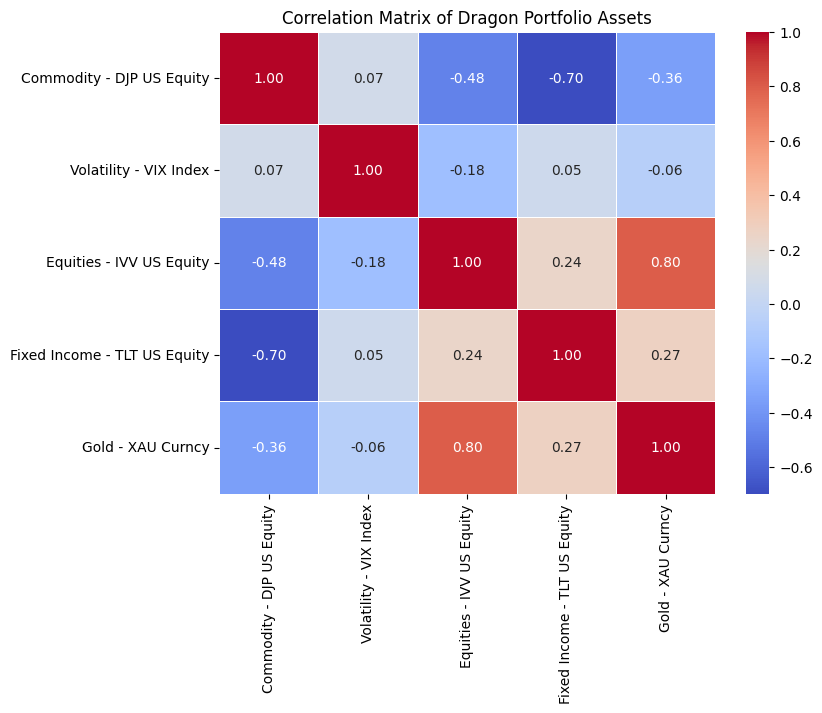

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix (excluding Dates)
correlation_matrix = dragon_portfolio.drop(columns=["Dates"]).corr()

# Set up the figure size
plt.figure(figsize=(8, 6))

# Create a heatmap with annotations
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, cbar=True)

# Add title
plt.title("Correlation Matrix of Dragon Portfolio Assets")

# Show the plot
plt.show()

In [33]:
dragon_portfolio.head()

,Dates,Commodity - DJP US Equity,Volatility - VIX Index,Equities - IVV US Equity,Fixed Income - TLT US Equity,Gold - XAU Curncy
0,2006-06-06,50.00,17.34,126.92,85.08,630.65
1,2006-06-07,50.20,17.80,126.05,85.10,626.45
2,2006-06-08,49.25,18.35,126.00,85.27,613.25
3,2006-06-09,48.85,18.12,125.60,85.72,607.45
4,2006-06-12,48.80,20.96,124.05,85.79,604.25


Annualized Return: 18.36%
Annualized Volatility: 23.86%
Sharpe Ratio: 0.77


/var/folders/ly/mr0404x501n5fsqtt6yhhbtm0000gn/T/ipykernel_23631/1938497721.py:10: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = dragon_portfolio[assets].pct_change()


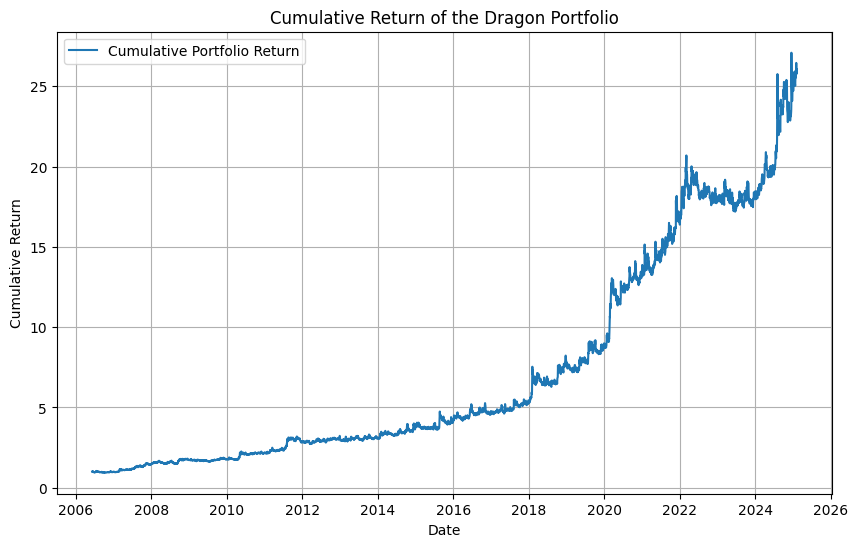

In [34]:
# Assuming the DataFrame is named dragon_portfolio
# Ensure the 'Dates' column is in datetime format
dragon_portfolio['Dates'] = pd.to_datetime(dragon_portfolio['Dates'], dayfirst=True)

# Compute daily returns for each asset
assets = ['Commodity - DJP US Equity', 'Volatility - VIX Index', 'Equities - IVV US Equity', 
          'Fixed Income - TLT US Equity', 'Gold - XAU Curncy']

# Calculate daily returns (percentage change)
returns = dragon_portfolio[assets].pct_change()

# Assign the portfolio weights
weights = {
    'Commodity - DJP US Equity': 0.18,
    'Volatility - VIX Index': 0.21,
    'Equities - IVV US Equity': 0.24,
    'Fixed Income - TLT US Equity': 0.18,
    'Gold - XAU Curncy': 0.19
}

# Calculate daily portfolio return
portfolio_return = (returns * list(weights.values())).sum(axis=1)

# Add the portfolio return to the DataFrame
dragon_portfolio['Portfolio Return'] = portfolio_return

# Calculate cumulative portfolio returns
dragon_portfolio['Cumulative Portfolio Return'] = (1 + dragon_portfolio['Portfolio Return']).cumprod()

# Annualize the returns
annualized_return = (dragon_portfolio['Cumulative Portfolio Return'].iloc[-1]) ** (252 / len(dragon_portfolio)) - 1

# Calculate annualized volatility (standard deviation of daily returns * sqrt(252))
annualized_volatility = portfolio_return.std() * np.sqrt(252)

# Calculate Sharpe Ratio assuming a risk-free rate of 0
sharpe_ratio = annualized_return / annualized_volatility

# Print the results
print(f"Annualized Return: {annualized_return * 100:.2f}%")
print(f"Annualized Volatility: {annualized_volatility * 100:.2f}%")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")

# Plot cumulative portfolio returns
plt.figure(figsize=(10, 6))
plt.plot(dragon_portfolio['Dates'], dragon_portfolio['Cumulative Portfolio Return'], label='Cumulative Portfolio Return')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.title('Cumulative Return of the Dragon Portfolio')
plt.legend()
plt.grid(True)
plt.show()
